# Loading the graph

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

In [43]:
# iterate each line as an edge
data = "../../soln/9.soln"
parseNode = lambda x: tuple((int(y) for y in x.split(' ')))
G = nx.read_edgelist(data, create_using=nx.DiGraph(), nodetype=parseNode, delimiter=' -> ')

print(G.edges())

[((1,), (1, 2, 3, 4)), ((1, 2, 3, 4), (1, 2, 3, 4, 7, 8)), ((2, 3, 4), (1, 2, 3, 4)), ((2, 3, 4), (2, 3, 4, 5)), ((2, 3, 4), (2, 3, 4, 6)), ((2, 3, 4, 5), (1, 2, 3, 4, 5, 7, 8)), ((2, 3, 4, 5), (2, 3, 4, 5, 6, 8)), ((2, 3, 4, 5), (2, 3, 4, 5, 6, 9)), ((2, 3, 4, 6), (2, 3, 4, 5, 6, 8)), ((2, 3, 4, 6), (2, 3, 4, 5, 6, 9)), ((1, 2, 3, 4, 7, 8), (1, 2, 3, 4, 5, 7, 8))]


## Visualize the data
with a custom layout

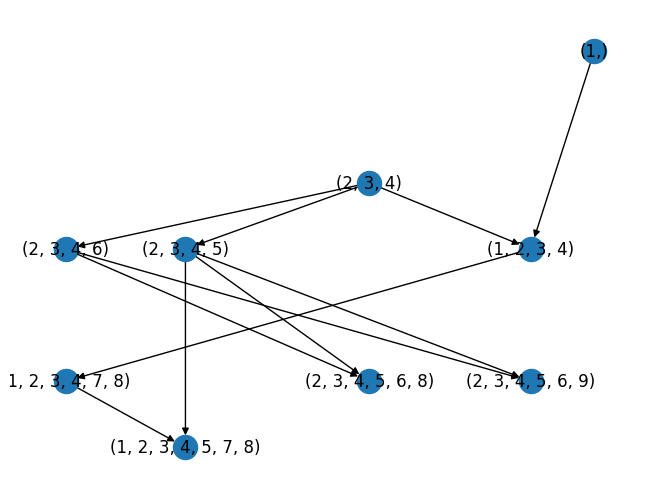

In [44]:
def height_layout(G):
    # start with a circular layout and adjust the y cords to the length of the node content
    pos = nx.circular_layout(G)
    pos = { node: [x, -len(node)] for node, (x, y) in pos.items() }
    pos = nx.drawing.layout.rescale_layout_dict(pos, scale=1)
    return pos


nx.draw(G, height_layout(G), with_labels=True)
plt.show()

# Analyzing for Convergent Evolution

## Phase 1: Find independently evolved traits

### The Algorithm
1. is to start at the leaf nodes
2. filter the graph for connected nodes
   - such that there is no common ancestors between leaf nodes
3. determine new information present in the filtered lineages (leafNode - rootNode)
4. compare leaf nodes for common information

In [45]:
leafs = [node for node, degree in G.out_degree() if degree == 0] # leaf nodes have out degree 0
ancestors = [nx.ancestors(G, leaf) for leaf in leafs]

frequency = {}
for ancestor in ancestors:
    for node in ancestor:
        frequency[node] = frequency.get(node, 0) + 1

mutual = [set(node) for node, freq in frequency.items() if freq != 1]
mutual_labels = set.union(*mutual)

exclusive_labels = { leaf: set(leaf) - mutual_labels for leaf in leafs }

print(exclusive_labels)

{(1, 2, 3, 4, 5, 7, 8): {8, 1, 7}, (2, 3, 4, 5, 6, 8): {8}, (2, 3, 4, 5, 6, 9): {9}}


In [46]:
for leaf in leafs:
    labels = exclusive_labels[leaf]
    print(f"Leaf {leaf} independently evolved {labels}")

Leaf (1, 2, 3, 4, 5, 7, 8) independently evolved {8, 1, 7}
Leaf (2, 3, 4, 5, 6, 8) independently evolved {8}
Leaf (2, 3, 4, 5, 6, 9) independently evolved {9}


## Phase 2: Convergent Evolution

### The algorithm
look for overlap between independently evolved traits among the lineage.

In [49]:
frequency = {}

for traits in exclusive_labels.values():
    for trait in traits:
        frequency[trait] = frequency.get(trait, 0) + 1

for trait in frequency:
    if frequency[trait] != 1:
        print(f"Trait {trait} independently evolved {frequency[trait]} times")

Trait 8 independently evolved 2 times
